# About S&P 500

The S&P 500 is a stock market index that tracks the largest 500 publicly traded U.S. companies. Investors have long used the S&P 500 as a benchmark for their investments as it tends to signal overall market health.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
style.use("fivethirtyeight")

# Import Dataset

Here we import 4 datasets which are 
- XOM Full & Partial Dataset 
- JNJ Full & Partial Dataset 

In [2]:
##### Read XOM and JNJ file into dataframe #####
## read XOM full dataset
XOM_full_ds = pd.read_csv('dataset/XOM.csv', index_col=None, parse_dates=['Date'], date_parser=lambda d: pd.Timestamp(d).strftime("%d-%b-%Y"))
# get XOM partial dataset (drop by date)
XOM_partial_ds = XOM_full_ds.loc[(XOM_full_ds['Date'] >= '2018-07-12') & (XOM_full_ds['Date'] <= '2022-07-12')]


JNJ_full_ds = pd.read_csv('dataset/JNJ.csv', index_col=None, parse_dates=['Date'], date_parser=lambda d: pd.Timestamp(d).strftime("%d-%b-%Y"))
# get XOM partial dataset (drop by date)
JNJ_partial_ds = JNJ_full_ds.loc[(JNJ_full_ds['Date'] >= '2018-07-12') & (JNJ_full_ds['Date'] <= '2022-07-12')]

# Descriptive Analytics

The major characteristics of the dataset are distilled and summarised using the descriptive analysis. It can show what kind of information the dataset contains. The following significant discoveries can be seen by applying this strategy to the S&P 500 Stock (XOM and JNJ) dataset:

#### Data Feature and Description In Dataset

- Date: The date is in the format yy-mm-dd
- Open: Price of the stock when the market opens
- High: Highest price reached in the day
- Low: Lowest price reached in the day
- Close: Price of the stock when the market closes
- Volume: Number of shares traded in a day
- Dividends: The dividends of the stock
- Stock Splits: The stock splits of the company. In a stock split, a company divides its existing stock into multiple shares to boost liquidity.

#### Basic Information of Dataset 

Basic Information included number of observations, columns, variable type and the total memory usage. 


- From the Full dataset have 15236 observations, 8 columns and with no null values. 
- From the Partial dataset have 1007 observations , 8 columns and with no null values.
- The data types of the variables are divided in 7 float, 1 integer and 1 date.
- Variables consist of continuous variables except for Date(date) and Volume(int).

In [3]:
print("\n                XOM (Full)")
print('====================================================')
print(XOM_full_ds.info())

print("\n                XOM (Partial)")
print('====================================================')
print(XOM_partial_ds.info())

print("\n                JNJ (Full)")
print('====================================================')
print(JNJ_full_ds.info())

print("\n                 JNJ (Partial)")
print('====================================================')
print(JNJ_partial_ds.info())


                XOM (Full)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15236 entries, 0 to 15235
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          15236 non-null  datetime64[ns]
 1   Open          15236 non-null  float64       
 2   High          15236 non-null  float64       
 3   Low           15236 non-null  float64       
 4   Close         15236 non-null  float64       
 5   Volume        15236 non-null  int64         
 6   Dividends     15236 non-null  float64       
 7   Stock Splits  15236 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 952.4 KB
None

                XOM (Partial)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007 entries, 14229 to 15235
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1007 non-null   datetime64[

- From the Full XOM and JNJ Dataset, we found that the minimum of open price is 0 .0 open price is invalid because open price won't have 0 value.
- From the Full XOM Dataset ,the mean for OHLC and Average are consistent which falls within the range around 100-106+-
- From the Full JNJ Dataset ,the mean for OHLC and Average are consistent which falls within the range around 183-186+-

In [4]:
print("\n                XOM (Full)")
print('====================================================')
print(XOM_full_ds.describe())

print("\n                XOM (Partial)")
print('====================================================')
print(XOM_partial_ds.describe())

print("\n                JNJ (Full)")
print('====================================================')
print(JNJ_full_ds.describe())

print("\n                 JNJ (Partial)")
print('====================================================')
print(JNJ_partial_ds.describe())


                XOM (Full)
               Open          High           Low         Close        Volume  \
count  15236.000000  15236.000000  15236.000000  15236.000000  1.523600e+04   
mean      19.213309     19.413783     19.056496     19.240627  9.185343e+06   
std       23.735742     23.926003     23.509386     23.724471  9.508606e+06   
min        0.000000      0.098981      0.092604      0.093879  1.760000e+05   
25%        0.416425      0.419433      0.414074      0.416425  2.582700e+06   
50%        5.592332      5.640518      5.563826      5.591053  6.066800e+06   
75%       38.369697     38.841302     37.972229     38.431069  1.232000e+07   
max      103.489998    105.570000    102.980003    104.589996  1.180235e+08   

          Dividends  Stock Splits  
count  15236.000000  15236.000000  
mean       0.004020      0.000656  
std        0.045356      0.036226  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%     

# Data Preprocessing

### Step 1. Feature Selection - Pearson Correlation 

#### XOM 

Since only Open, High , Low , Close (OHLC) have a high correlation , we will be transform OHLC into new variable 'Average'

                   XOM Feature correlation 
               Open      High       Low     Close    Volume  Dividends
Open       1.000000  0.999933  0.999923  0.999868  0.657144   0.084887
High       0.999933  1.000000  0.999889  0.999931  0.660320   0.084481
Low        0.999923  0.999889  1.000000  0.999931  0.653040   0.084322
Close      0.999868  0.999931  0.999931  1.000000  0.656634   0.084252
Volume     0.657144  0.660320  0.653040  0.656634  1.000000   0.059860
Dividends  0.084887  0.084481  0.084322  0.084252  0.059860   1.000000


                   XOM Feature correlation > 0.9
            Open   High    Low  Close  Volume  Dividends
Open        True   True   True   True   False      False
High        True   True   True   True   False      False
Low         True   True   True   True   False      False
Close       True   True   True   True   False      False
Volume     False  False  False  False    True      False
Dividends  False  False  False  False   False       True



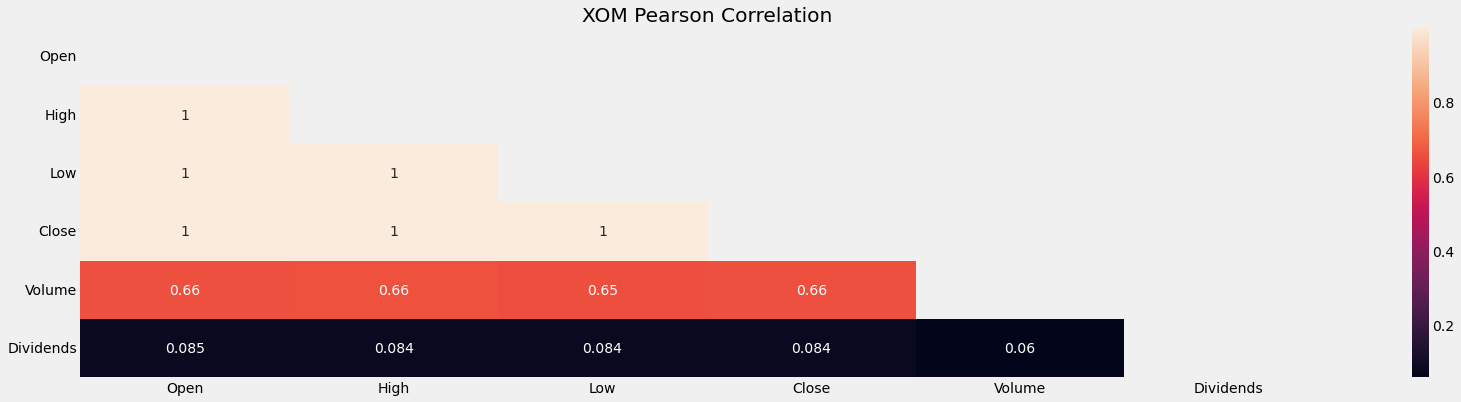

In [5]:
XOM = XOM_full_ds.iloc[:, :-1]
print('                   XOM Feature correlation ')
print('=======================================================================')
print(XOM.corr())

cor_target=abs(XOM.corr())
XOM_relevant_features=cor_target>0.9
print('\n\n                   XOM Feature correlation > 0.9')
print('=======================================================================')
print(XOM_relevant_features)
print()

mask=np.zeros_like(XOM.corr()) #Get an array of 0s with the same shape and type as a given array
triangle_indices=np.triu_indices_from(mask) #Return the indices for the upper-triangle of arr(top triangle)
mask[triangle_indices]=True
plt.figure(figsize=(25,6)) #Set size of figure
sns.heatmap(XOM.corr(),mask=mask,annot=True) 
plt.title('XOM Pearson Correlation')
plt.show()

#### JNJ 

Since only Open, High , Low , Close (OHLC) have a high correlation , we will be transform OHLC into new variable 'Average'

                   JNJ Feature correlation 
               Open      High       Low     Close    Volume  Dividends
Open       1.000000  0.999965  0.999955  0.999930  0.344961   0.099924
High       0.999965  1.000000  0.999940  0.999964  0.345711   0.099736
Low        0.999955  0.999940  1.000000  0.999963  0.343102   0.099934
Close      0.999930  0.999964  0.999963  1.000000  0.344358   0.099701
Volume     0.344961  0.345711  0.343102  0.344358  1.000000   0.040416
Dividends  0.099924  0.099736  0.099934  0.099701  0.040416   1.000000


                   XOM Feature correlation > 0.9
            Open   High    Low  Close  Volume  Dividends
Open        True   True   True   True   False      False
High        True   True   True   True   False      False
Low         True   True   True   True   False      False
Close       True   True   True   True   False      False
Volume     False  False  False  False    True      False
Dividends  False  False  False  False   False       True



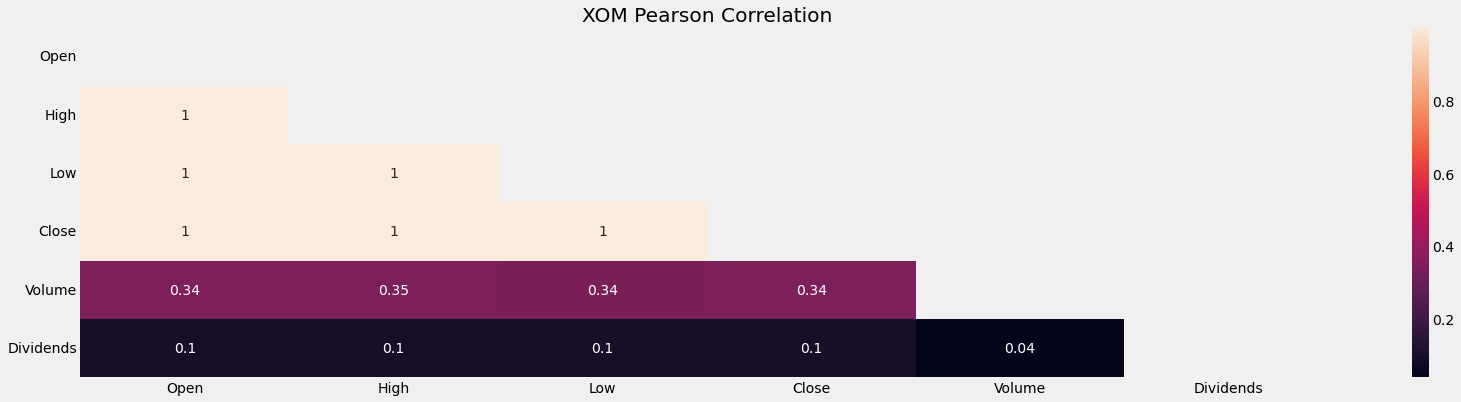

In [6]:
JNJ = JNJ_full_ds.iloc[:, :-1]
print('                   JNJ Feature correlation ')
print('=======================================================================')
print(JNJ.corr())

cor_target=abs(JNJ.corr())
JNJ_relevant_features=cor_target>0.9
print('\n\n                   XOM Feature correlation > 0.9')
print('=======================================================================')
print(JNJ_relevant_features)
print()

mask=np.zeros_like(JNJ.corr()) #Get an array of 0s with the same shape and type as a given array
triangle_indices=np.triu_indices_from(mask) #Return the indices for the upper-triangle of arr(top triangle)
mask[triangle_indices]=True
plt.figure(figsize=(25,6)) #Set size of figure
sns.heatmap(JNJ.corr(),mask=mask,annot=True) 
plt.title('XOM Pearson Correlation')
plt.show()

#### Transform OHLC into new variable

In [7]:
XOM_full_ds.insert(8,"Average",(XOM_full_ds['Open']+XOM_full_ds['High']+XOM_full_ds['Low']+XOM_full_ds['Close'])/4,True)
JNJ_full_ds.insert(8,"Average",(JNJ_full_ds['Open']+JNJ_full_ds['High']+JNJ_full_ds['Low']+JNJ_full_ds['Close'])/4,True)
XOM_partial_ds.insert(8,"Average",(XOM_partial_ds['Open']+XOM_partial_ds['High']+XOM_partial_ds['Low']+XOM_partial_ds['Close'])/4,True)
JNJ_partial_ds.insert(8,"Average",(JNJ_partial_ds['Open']+JNJ_partial_ds['High']+JNJ_partial_ds['Low']+JNJ_partial_ds['Close'])/4,True)

### Step 2. Check for missing values 

Checking for any null values to ensure data quality and accuracy.

- Based on the results given, no missing values contain in these 4 dataset.

In [8]:
print("\nMissing values in XOM dataset (Full)")
print('====================================================')
print(XOM_full_ds.isnull().sum())
print("\nMissing values in XOM dataset (Partial)")
print('====================================================')
print(XOM_partial_ds.isnull().sum())

print("\nMissing values in JNJ dataset (Full)")
print('====================================================')
print(JNJ_full_ds.isnull().sum())
print("\nMissing values in JNJ dataset (Partial)")
print('====================================================')
print(JNJ_partial_ds.isnull().sum())


Missing values in XOM dataset (Full)
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Average         0
dtype: int64

Missing values in XOM dataset (Partial)
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Average         0
dtype: int64

Missing values in JNJ dataset (Full)
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Average         0
dtype: int64

Missing values in JNJ dataset (Partial)
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Average         0
dtype: int64


### Step 3.  Check for Outliers (Based on descriptive statistics on Dataset)

Outliers in a dataset have to be detected and treated because it also affects the data quality and reliability which causes inaccurate and unreliable analysis results and affects the performance of the algorithm

- A zero value for the opening price is not valid because the stock price of a company will only drop to zero if a company bankrupts.Based on the description of Dataset, it is show that only FULL XOM and JNJ dataset's Open have contain minimum value of 0.

In [9]:
print("\n                     XOM Dataset Description (Full)")
print('================================================================================')
print(XOM_full_ds.describe())

print("\n\n                   XOM Dataset Description (Partial)")
print('================================================================================')
print(XOM_partial_ds.describe())

print("\n\n                   XOM Dataset Description (Full)")
print('================================================================================')
print(JNJ_full_ds.describe())

print("\n\n                   JNJ Dataset Description (Partial)")
print('================================================================================')
print(JNJ_partial_ds.describe())


                     XOM Dataset Description (Full)
               Open          High           Low         Close        Volume  \
count  15236.000000  15236.000000  15236.000000  15236.000000  1.523600e+04   
mean      19.213309     19.413783     19.056496     19.240627  9.185343e+06   
std       23.735742     23.926003     23.509386     23.724471  9.508606e+06   
min        0.000000      0.098981      0.092604      0.093879  1.760000e+05   
25%        0.416425      0.419433      0.414074      0.416425  2.582700e+06   
50%        5.592332      5.640518      5.563826      5.591053  6.066800e+06   
75%       38.369697     38.841302     37.972229     38.431069  1.232000e+07   
max      103.489998    105.570000    102.980003    104.589996  1.180235e+08   

          Dividends  Stock Splits       Average  
count  15236.000000  15236.000000  15236.000000  
mean       0.004020      0.000656     19.231054  
std        0.045356      0.036226     23.723123  
min        0.000000      0.000000  

In [10]:
print("\n                     XOM Dataset Open (Full)")
print('================================================================================')
open0XOM_full = XOM_full_ds[XOM_full_ds['Open'] == 0]
print(open0XOM_full)

print("\n\n                   XOM Dataset Open (Partial)")
print('================================================================================')
open0XOM_partial = XOM_partial_ds[XOM_partial_ds['Open'] == 0]
print(open0XOM_partial)

print("\n\n                   XOM Dataset Open (Full)")
print('================================================================================')
open0JNJ_full = JNJ_full_ds[JNJ_full_ds['Open'] == 0]
print(open0JNJ_full)

print("\n\n                   JNJ Dataset Open (Partial)")
print('================================================================================')
open0JNJ_partial = JNJ_partial_ds[JNJ_partial_ds['Open'] == 0]
print(open0JNJ_partial)


                     XOM Dataset Open (Full)
           Date  Open      High       Low     Close   Volume  Dividends  \
0    1962-01-02   0.0  0.101570  0.100822  0.100822   902400        0.0   
1    1962-01-03   0.0  0.102319  0.100822  0.102319  1200000        0.0   
2    1962-01-04   0.0  0.103068  0.102069  0.102569  1088000        0.0   
3    1962-01-05   0.0  0.103068  0.100073  0.100323  1222400        0.0   
4    1962-01-08   0.0  0.101071  0.098825  0.100073  1388800        0.0   
...         ...   ...       ...       ...       ...      ...        ...   
1982 1969-12-24   0.0  0.173276  0.171533  0.173276  1488000        0.0   
1983 1969-12-26   0.0  0.173276  0.171533  0.173276   899200        0.0   
1984 1969-12-29   0.0  0.173276  0.171533  0.171533  1833600        0.0   
1985 1969-12-30   0.0  0.173625  0.171533  0.171533  2534400        0.0   
1986 1969-12-31   0.0  0.173276  0.171533  0.172230  3414400        0.0   

      Stock Splits   Average  
0              0.0  0.

***

# Exploratory Data Analytics (EDA)

### 1. Historical Stock Data and Trend

The chart displays the average stock price movement for JNJ (Johnson & Johnson) and XOM (Exxon Mobil Corp) over a roughly 60-year period from 1962 to 2022. Full dataset (original set without any modification) is used to observe the overall trend of each stock. The line chart is plotted for each based on the average column. 


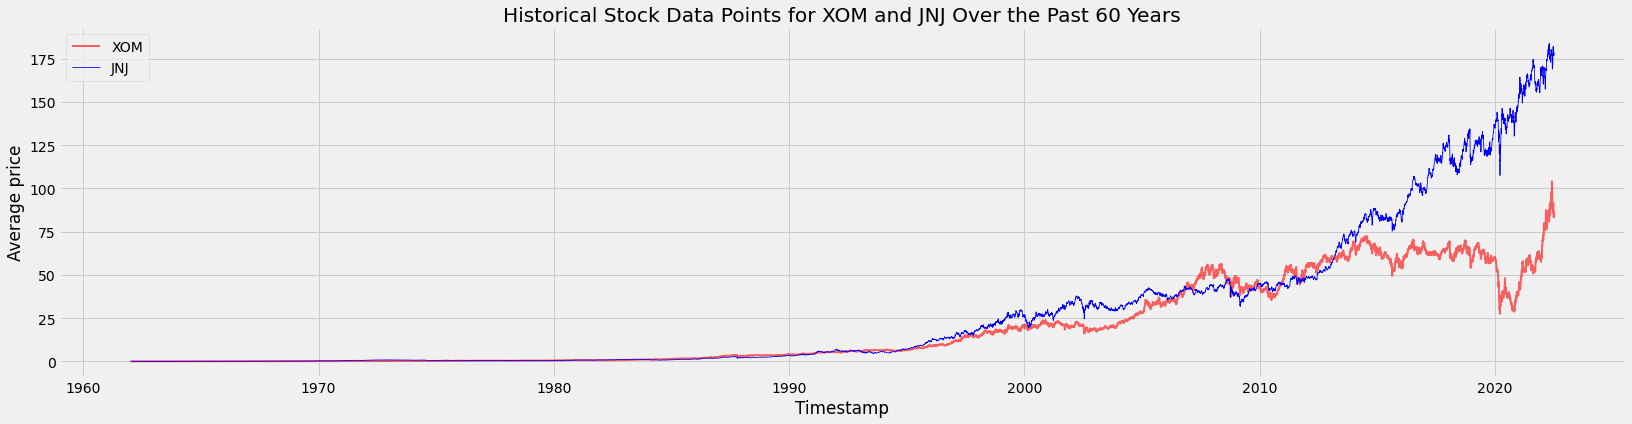

In [11]:
# Full dataset to observe the trend
plt.figure(figsize=(25,6))
plt.plot(XOM_full_ds['Date'], XOM_full_ds['Average'], color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(JNJ_full_ds['Date'], JNJ_full_ds['Average'], color = 'blue', linewidth=0.8)
plt.legend(['XOM','JNJ'])
plt.xlabel('Timestamp')
plt.ylabel('Average price')
plt.title("Historical Stock Data Points for XOM and JNJ Over the Past 60 Years")
plt.show()

To gain a clearer view, partial dataset (original dataset with size reduced) is used to depicts the trend over the past four years.

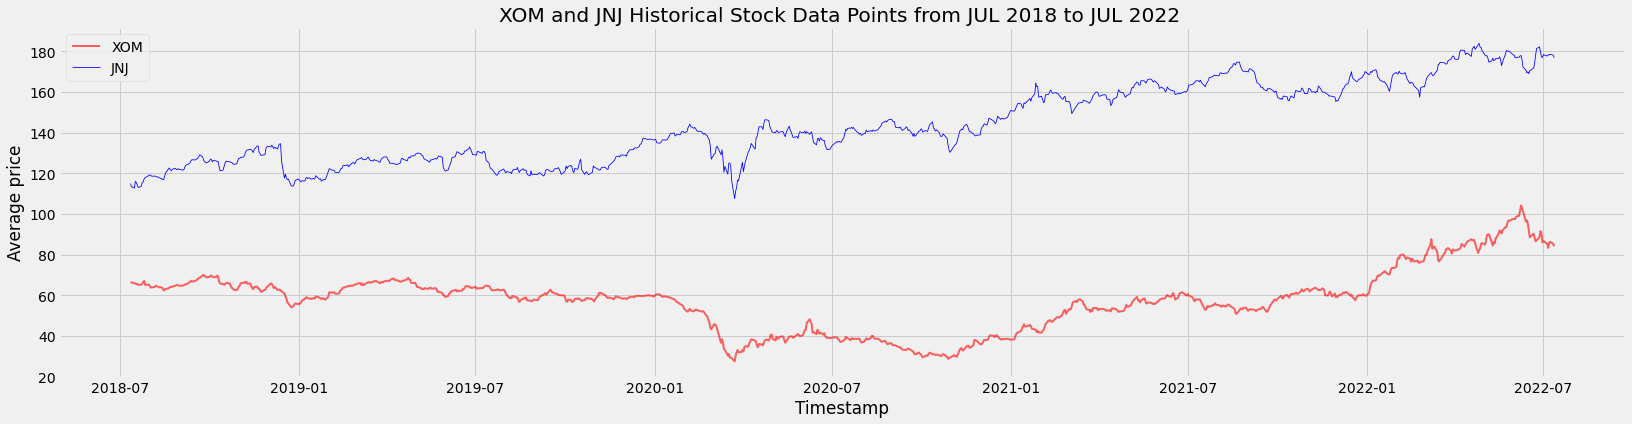

In [12]:
# partial to have a deeper view
plt.figure(figsize=(25,6))
plt.plot(XOM_partial_ds['Date'], XOM_partial_ds['Average'], color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(JNJ_partial_ds['Date'], JNJ_partial_ds['Average'], color = 'blue', linewidth=0.8)
plt.legend(['XOM','JNJ'])
plt.xlabel('Timestamp')
plt.ylabel('Average price')
plt.title("XOM and JNJ Historical Stock Data Points from JUL 2018 to JUL 2022 ")
plt.show()

The result shows that the average price of JNJ has consistently outperformed XOM. 

### 2.  Historical Stock Volume

The chart displays the changes in stock volume for JNJ (Johnson & Johnson) and XOM (Exxon Mobil Corp) over a roughly 60-year period from 1962 to 2022. The full dataset (original set without any modification) is used to capture the overview, whereas the partial dataset is used to obtain a clearer view.

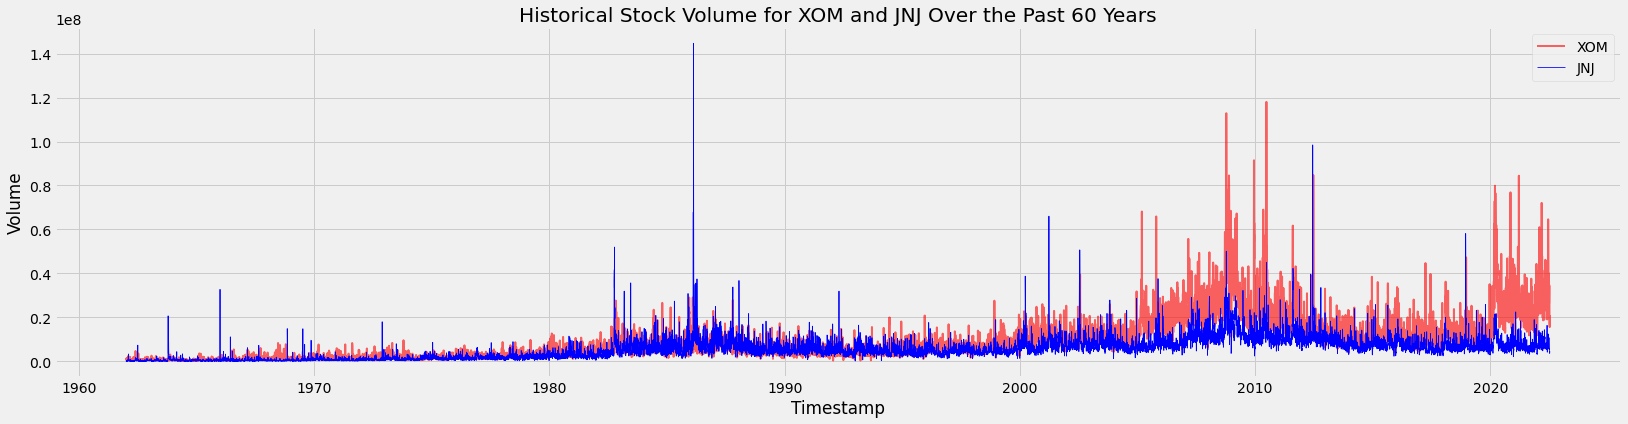

In [13]:
# Plot the total volume of each stock being traded each day
plt.figure(figsize=(25,6))
plt.plot(XOM_full_ds['Date'], XOM_full_ds['Volume'], color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(JNJ_full_ds['Date'], JNJ_full_ds['Volume'], color = 'blue', linewidth=0.8)
plt.legend(['XOM','JNJ'])
plt.xlabel('Timestamp')
plt.ylabel('Volume')
plt.title("Historical Stock Volume for XOM and JNJ Over the Past 60 Years")
plt.show()

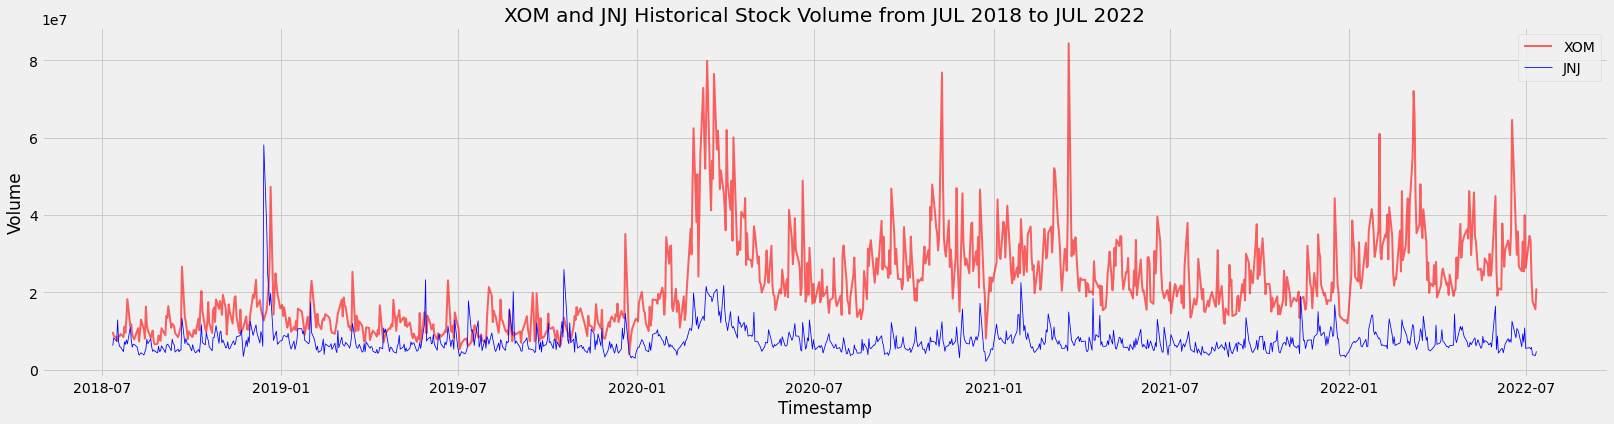

In [14]:
# Plotting the total volume of stock being traded each day
plt.figure(figsize=(25,6))
plt.plot(XOM_partial_ds['Date'], XOM_partial_ds['Volume'], color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(JNJ_partial_ds['Date'], JNJ_partial_ds['Volume'], color = 'blue', linewidth=0.8)
plt.legend(['XOM','JNJ'])
plt.xlabel('Timestamp')
plt.ylabel('Volume')
plt.title("XOM and JNJ Historical Stock Volume from JUL 2018 to JUL 2022")
plt.show()

Note: No useful insights can be captured from the volume chart.

### 3. Calculating Moving Average with lag of 10, 100, 365 days (using partial data only)

- Moving average (MA) is a stock indicator commonly used in technical analysis. The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated average price.
- It helps to level the price data over a specified period by creating a constantly updated average price.
- By calculating the moving average, the impacts of random, short-term fluctuations on the price of a stock over a specified time frame are mitigated.

In [15]:
# Plot several moving averages (based company)
ma_timeframe = [10,100,365]
def getMovingAverage(dataset, df_name):
    df = dataset.copy()
    df.set_index('Date', inplace=True)
    for ma in ma_timeframe:
        column_name = "MA for %s days" %(str(ma))
        df[column_name]=pd.DataFrame.rolling(df['Average'],ma).mean()
    
    df[['Average','MA for 10 days','MA for 100 days','MA for 365 days']].plot(subplots=False,figsize=(25,6), linewidth=1.5)
    plt.title("Moving Average for "+ df_name)
    plt.show()

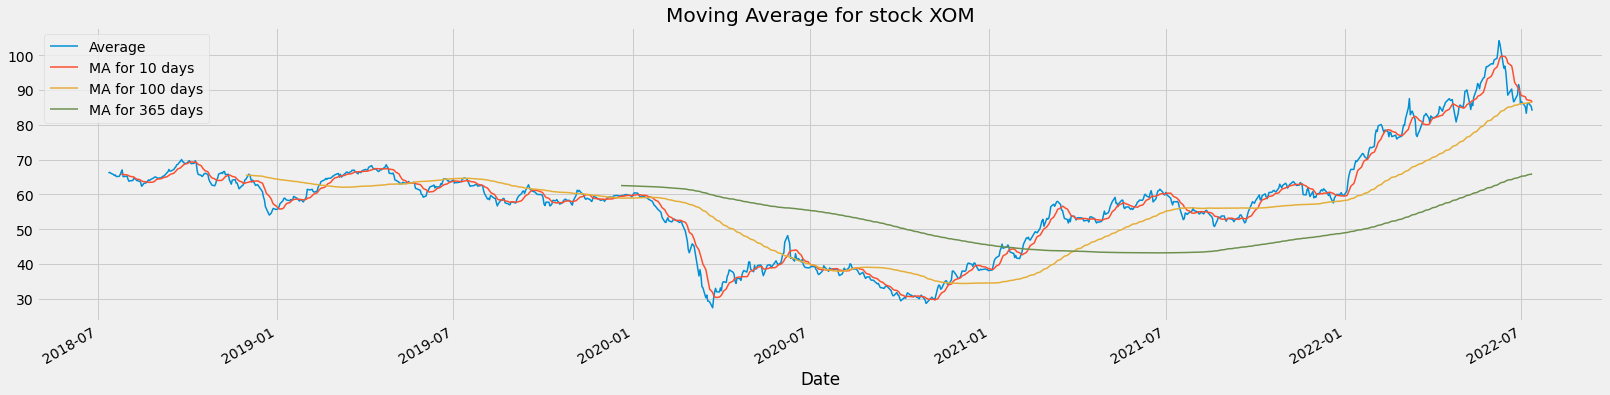

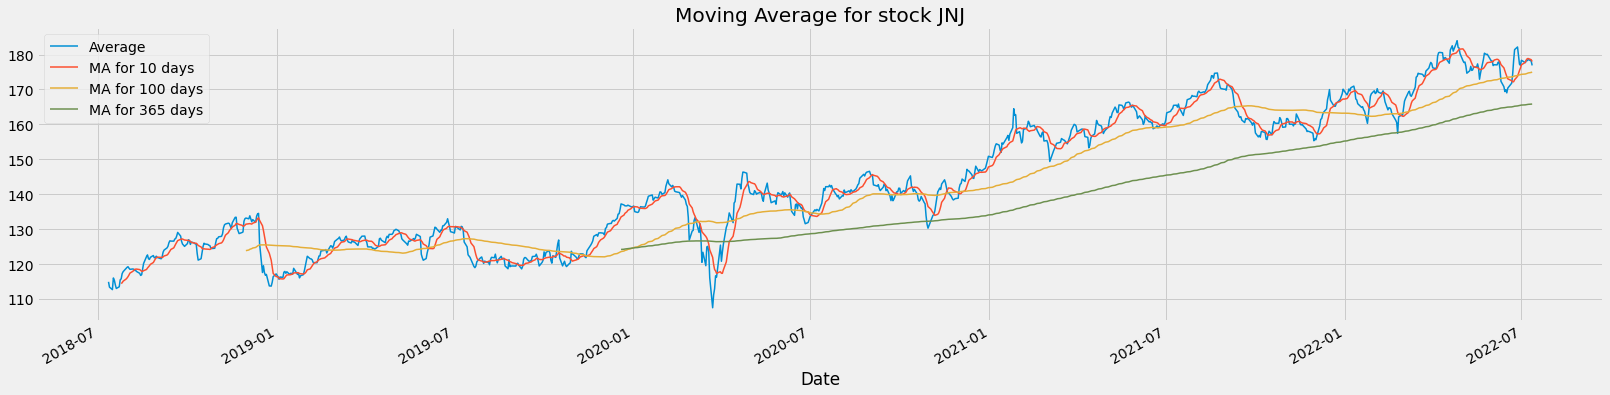

In [16]:
getMovingAverage(XOM_partial_ds, "stock XOM")
getMovingAverage(JNJ_partial_ds, "stock JNJ")

Interpreting bearish and bullish signals based on XOM output:

<img src="img/bullishNbearish.png" alt="Bullish and Bearish" style="width: 500px;"/>

As a result, the XOM can be said to be in a bull market beginning at the end of 2021. In which all of its short-term moving averages cross over the long-term moving average. If we compare the short-term average (10 MA) with intermediate moving average (100 MA), JNJ exhibits a considerably greater degree of ups and downs (many buy and sell signals are generated). In such a circumstance, it is advised to compare either the short-term (10 MA) or intermediate (100 MA) with long-term (356 MA) in order to get a decent overall picture.

### 4. Plot Percent Change(%) of Daily Returns using pct_change()

- Daily return on a stock is used to measure the day to day performance of stocks
- It is the price of stocks at today’s closure compared to the price of the same stock at yesterday’s closure. 
- Positive daily return means appreciation in stock price on daily comparison.
- The column "Average" is used for the daily return calculation.

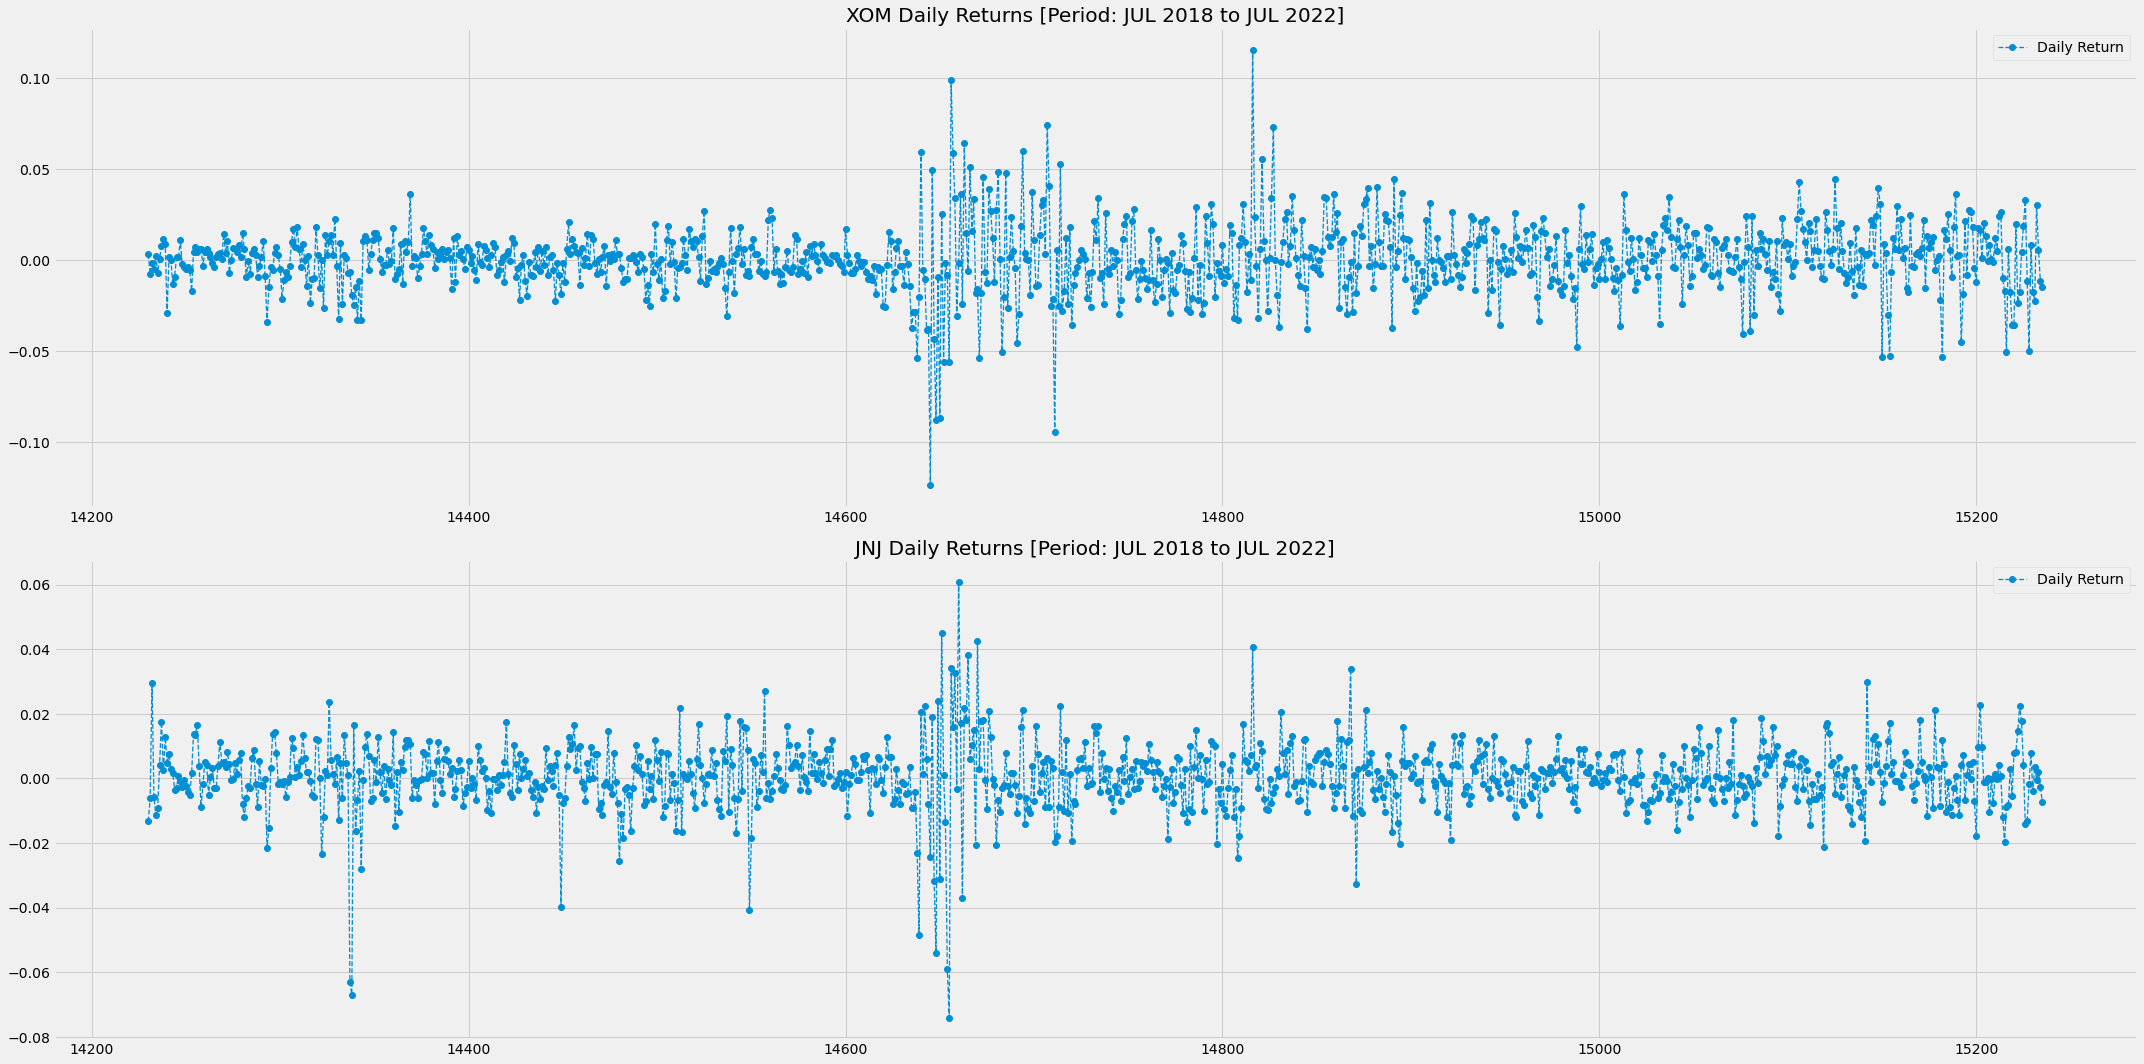

In [17]:
pd.options.mode.chained_assignment = None
# use pct_change to find the percent change for each day (in average column)
XOM_partial_ds['Daily Return'] = XOM_partial_ds['Average'].pct_change()
JNJ_partial_ds['Daily Return'] = JNJ_partial_ds['Average'].pct_change()
# To plot the daily return percentage
fig, axes = plt.subplots(nrows=2)

XOM_partial_ds['Daily Return'].plot(figsize=(30,15),ax=axes[0],legend=True,linestyle='--',marker='o', linewidth=1.3)
axes[0].set_title('XOM Daily Returns [Period: JUL 2018 to JUL 2022]')

JNJ_partial_ds['Daily Return'].plot(figsize=(30,15),ax=axes[1],legend=True,linestyle='--',marker='o', linewidth=1.3)
axes[1].set_title('JNJ Daily Returns [Period: JUL 2018 to JUL 2022]')

fig.tight_layout()

In [18]:
#drop the first Nan value to get the min of daily return for XOM
XOM_partial_ds = XOM_partial_ds.dropna()
Min_of_XOM = min(XOM_partial_ds['Daily Return'].values)
Max_of_XOM = max(XOM_partial_ds['Daily Return'].values)
print("Smallest/Minimum Daily Return of XOM: ",Min_of_XOM)
print("Largest/Maximum Daily Return of XOM: ",Max_of_XOM)
#drop the first Nan value to get the min of daily return for XOM
JNJ_partial_ds = JNJ_partial_ds.dropna()
Min_of_JNJ = min(JNJ_partial_ds['Daily Return'].values)
Max_of_JNJ = max(JNJ_partial_ds['Daily Return'].values)
print("Smallest/Minimum Daily Return of JNJ: ",Min_of_JNJ)
print("Largest/Maximum Daily Return of JNJ: ",Max_of_JNJ)

#Summaries
print("\n++++++++++++++++++++++++++++++++++++++++\nSUMMARIES\n++++++++++++++++++++++++++++++++++++++++")
print("Range of XOM Daily Return: [",Min_of_XOM ,", " , Max_of_XOM, "]")
print("Range of JNJ Daily Return: [",Min_of_JNJ ,", " , Max_of_JNJ, "]")

Smallest/Minimum Daily Return of XOM:  -0.12348236519057176
Largest/Maximum Daily Return of XOM:  0.11546610472042373
Smallest/Minimum Daily Return of JNJ:  -0.07400114961943638
Largest/Maximum Daily Return of JNJ:  0.06074920775807291

++++++++++++++++++++++++++++++++++++++++
SUMMARIES
++++++++++++++++++++++++++++++++++++++++
Range of XOM Daily Return: [ -0.12348236519057176 ,  0.11546610472042373 ]
Range of JNJ Daily Return: [ -0.07400114961943638 ,  0.06074920775807291 ]


Since XOM's daily return range is wider than JNJ's, it is clear that XOM is experiencing more fluctuations.

### 5. Risks versus Daily Returns

In [19]:
#get mean and standard deviation of each stock daily return 
mean = XOM_partial_ds['Daily Return'].mean()
std = XOM_partial_ds['Daily Return'].std()
print('XOM Daily Return Mean =',mean)
print('XOM Daily Return Standard Deviation =',std)

mean2 = JNJ_partial_ds['Daily Return'].mean()
std2 = JNJ_partial_ds['Daily Return'].std()
print('JNJ Daily Return Mean =',mean2)
print('JNJ Daily Return Standard Deviation =',std2)

XOM Daily Return Mean = 0.0004143165401657559
XOM Daily Return Standard Deviation = 0.01875101600494644
JNJ Daily Return Mean = 0.0004849787628796219
JNJ Daily Return Standard Deviation = 0.010602775823514562


Text(0.5, 1.0, 'Performance of JNJ and XOM stocks')

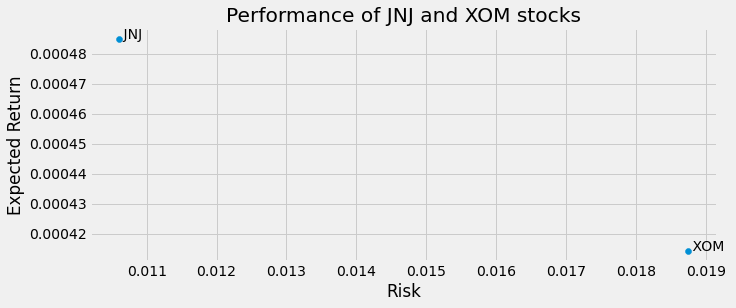

In [20]:
#plot the expected return (mean) against risk (standard deviation)
x = [XOM_partial_ds['Daily Return'].std(), JNJ_partial_ds['Daily Return'].std()]
y = [XOM_partial_ds['Daily Return'].mean(),JNJ_partial_ds['Daily Return'].mean()]
n = [' XOM ',' JNJ ']

fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

plt.xlabel('Risk')
plt.ylabel('Expected Return')
plt.title('Performance of JNJ and XOM stocks')

### 6. Heatmap of correlation between the average prices of the stocks XOM and JNJ 

In [21]:
#plot correlation between the 2 stocks
correlation_test = pd.DataFrame()
correlation_test['XOM']=XOM_full_ds['Average']
correlation_test['JNJ']=JNJ_full_ds['Average']

<AxesSubplot:>

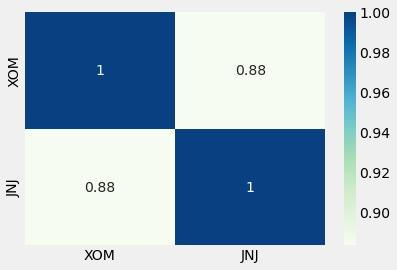

In [22]:
sns.heatmap(correlation_test.corr(),annot=True,cmap='GnBu',linecolor="black")

It displays an extremely high correlation of 0.88. In other words, it indicates that XOM and JNJ are likely to have a similar business nature, and as a result, if one is going through a downtrend, the other is most likely to go through the same. 

***